# T90 - Hardness Ratio

This notebook processes all catalogues _(CGRO/BATSE, FERMI/GBM, SWIFT/BAT)_ in T90-Spectral Hardness feature space. On each catalogue, it performs statistical calculations to assess the performance of the models individually. Then cross-compares the models created using each dataset.

Importing necessary packages.

In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
# add grbttools to path
import sys

sys.path.append("../")

import warnings
from grbtools import data as data_operations
from grbtools import disp as disp_operations
from grbtools import stats as stats_operations
from grbtools import models as model_operations
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(font_scale=1, style="whitegrid")
warnings.filterwarnings("ignore")
np.random.seed(1773)

Setting global variables.

In [9]:
features = ["lgT90", "lgHrd"]

cat_batse = "batse"
cat_fermi = "fermi"
cat_swift = "swift"

## 1. BATSE

Loading the data where the outliers are eliminated. A summary of data is printed and the data is plotted.

,lgT90,lgHrd
count,1924.000000,1924.000000
mean,1.023104,0.625694
std,0.903752,0.406057
min,-1.552842,-0.692426
25%,0.415039,0.364454
50%,1.283301,0.624354
75%,1.696112,0.905936
max,2.828546,1.999578


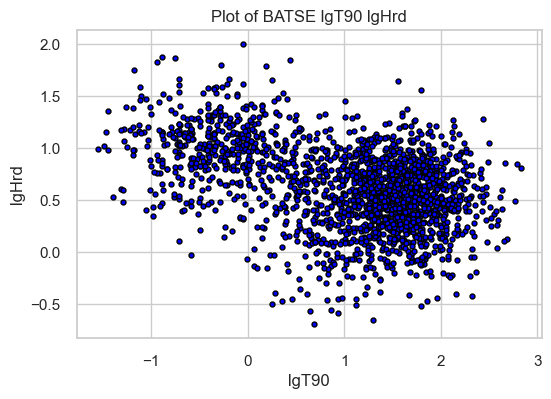

In [16]:
df_batse_t90_hrd = data_operations.load(
    cat_name=cat_batse,
    feats=features.copy(),
    without_outliers=True,
    plot_data=True,
    verbose=False,
)
df_batse_t90_hrd.describe()

Creating models. 10 models with clusters from 1 to 10 have been created and saved. 
- The clusters are sorted based on the means on the x-axis. In other words, the cluster with the lowest mean on x-axis is named as "Cluster 1", and the rest is sorted according to the increasing mean on x-axis.
- Covariance type is "full".
- "max_iter" and "n_init" parameters of GMM are set to 10000 and 100, respectively.


In [11]:
model_operations.createGMMs(
    dataset_name=cat_batse,
    data=df_batse_t90_hrd,
    cov_type="full",
    n_clusters_max=10,
    verbose=False,
    max_iter=10000,
    n_init=100,
    sorting_clusters=True,
    plot_model=False,
)

All models are successfully created.


Plotting the models with cluster decision boundaries. The clusters are sorted accoding to the means of the features on the x-axis.

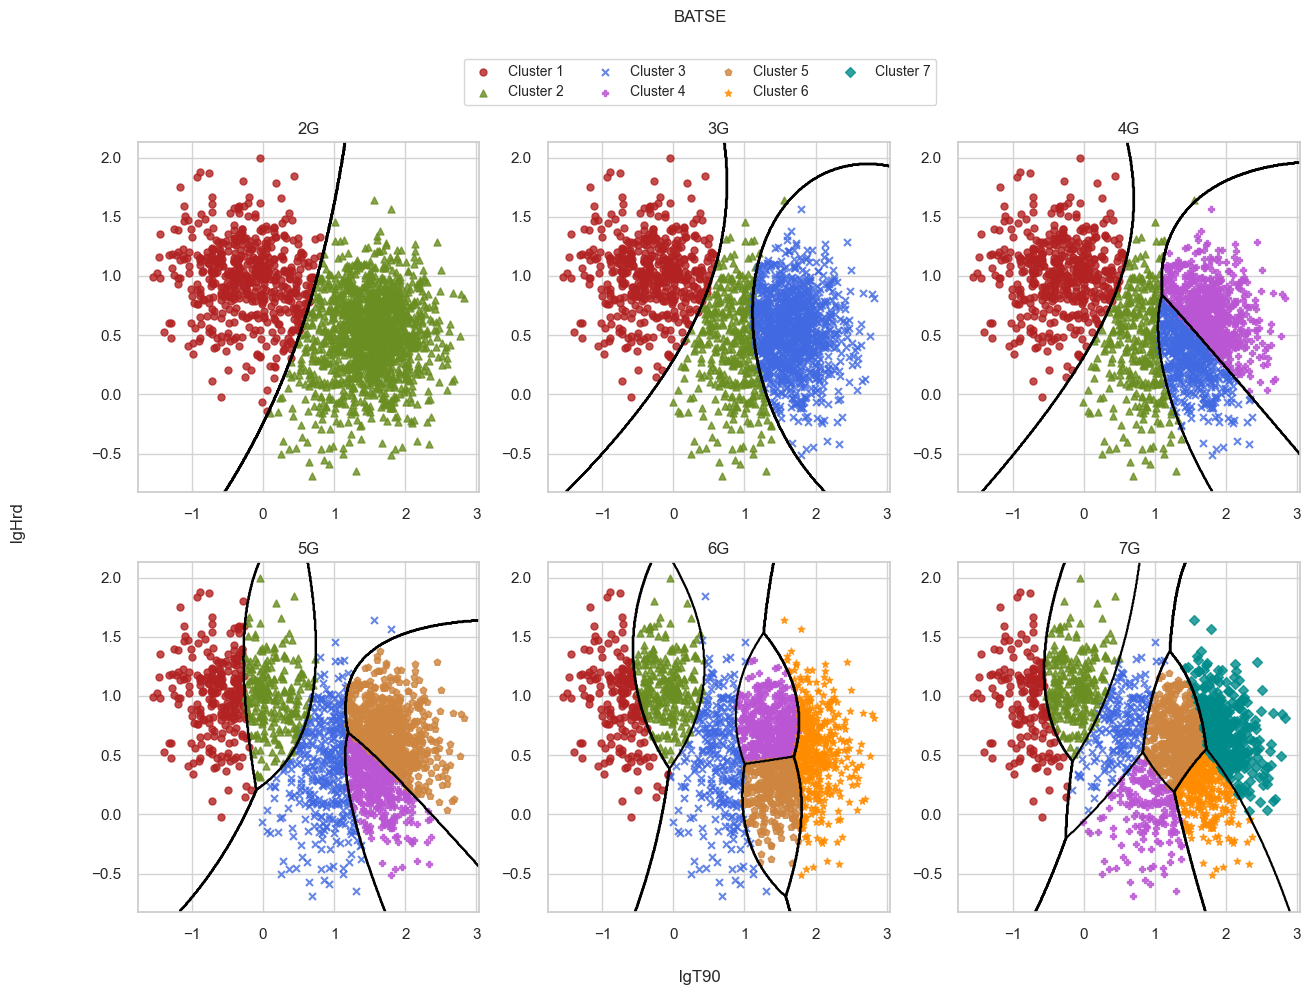

In [12]:
disp_operations.plot_models_as_grid(cat_name=cat_batse, data = df_batse_t90_hrd, feat_space=features.copy())

Evaluating the performance: AIC, BIC, WCSS, Silhouette scores, Gap statistics, Davies-Bouldin, and Calinski-Harabsz scores are calculated and plotted. Each metric is arranged according to "higher-is-better" logic.

In [13]:
scores, normalized_scores = stats_operations.perform_statistical_tests(df_batse_t90_hrd, features.copy(), cat_batse)
normalized_scores

,aic,bic,chs,dbs,gap,sil_euc,sil_mah,wcss
k,,,,,,,,
1,0.00,0.00,NaN,NaN,NaN,NaN,NaN,0.00
2,0.93,0.98,1.00,1.00,NaN,1.00,1.00,0.72
3,1.00,1.00,0.57,0.38,NaN,0.42,0.62,0.83
4,1.00,0.95,0.23,0.00,NaN,0.13,0.43,0.87
5,0.99,0.89,0.13,0.02,NaN,0.00,0.24,0.91
6,0.98,0.82,0.12,0.25,NaN,0.06,0.10,0.94
7,0.97,0.77,0.18,0.31,NaN,0.13,0.10,0.97
8,0.96,0.70,0.10,0.25,NaN,0.06,0.10,0.98
9,0.95,0.64,0.02,0.12,NaN,0.06,0.05,0.99


The scores are plotted. The numbers are arranged in a way that higher values indicate better performance. X-axis is the number of clusters, y-axis is the scores.

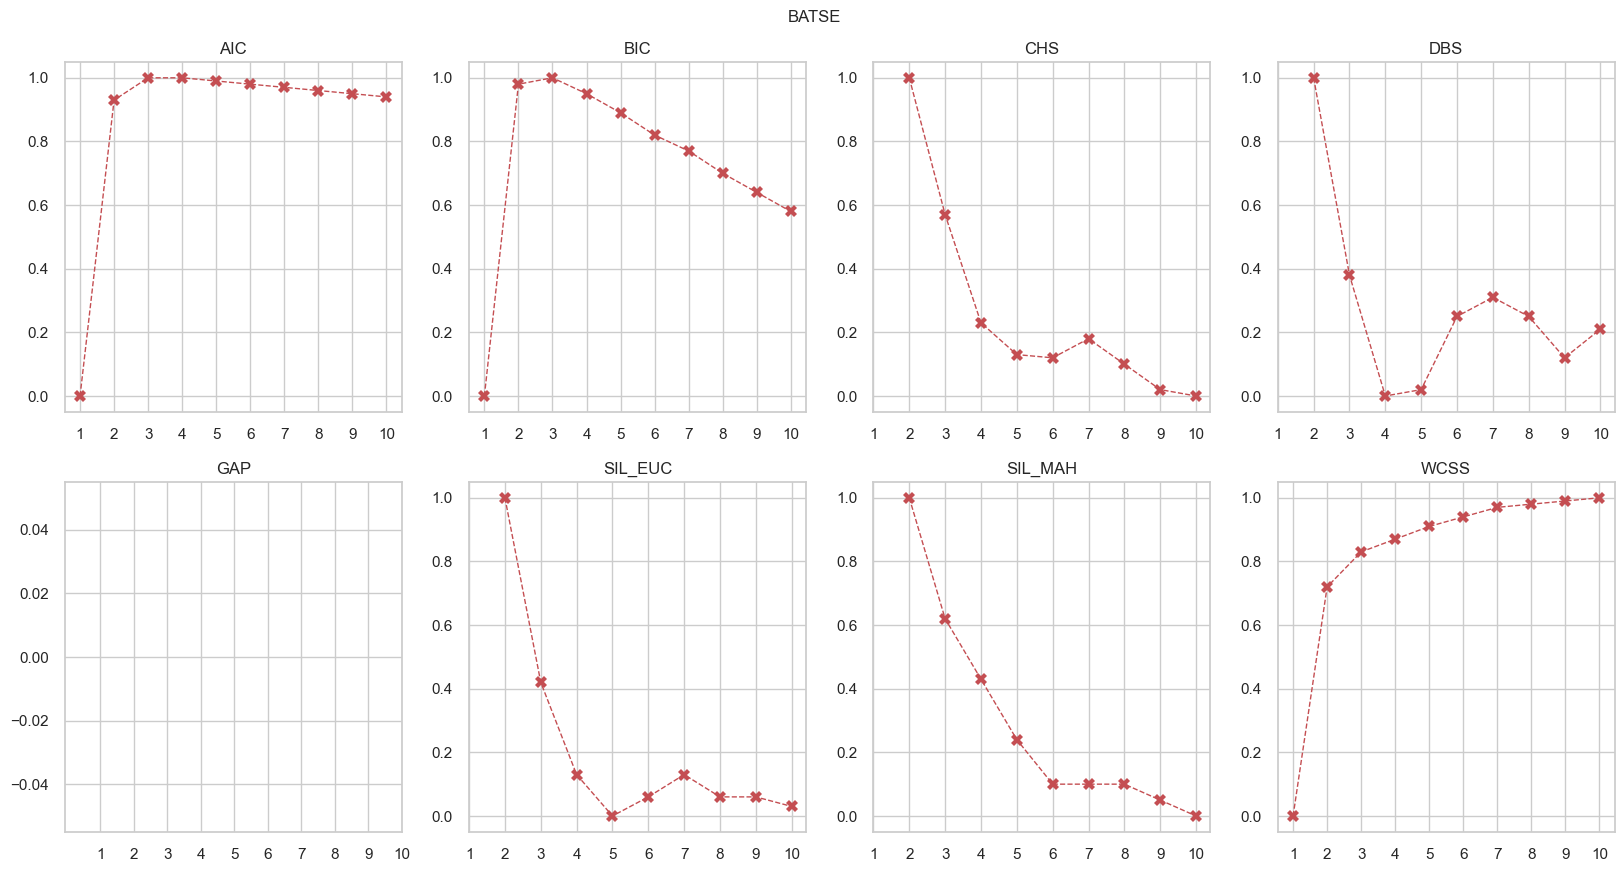

In [14]:
disp_operations.plot_scores_as_grid(normalized_scores, cat_batse)

Heatmap of the scores:

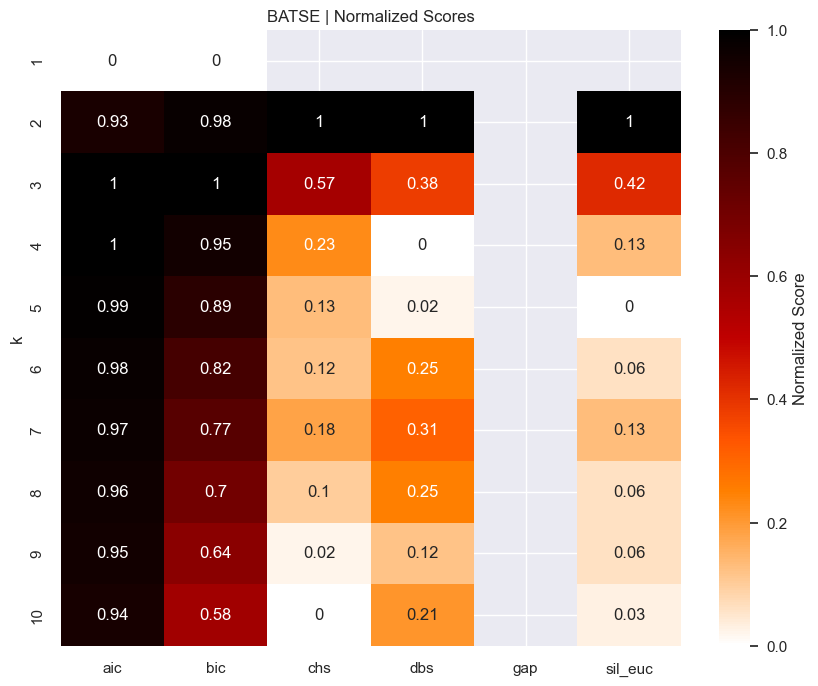

In [138]:
disp_operations.plot_heatmap(normalized_scores, cat_batse)

----

## 2. FERMI

Loading the data where the outliers are eliminated. A summary of data is printed and the data is plotted.

,lgT90,lgHrd
count,2291.000000,2291.000000
mean,1.133155,0.584350
std,0.778158,0.346653
min,-1.494850,-0.746089
25%,0.779283,0.359175
50%,1.316725,0.574944
75%,1.670700,0.798667
max,2.918383,2.037996


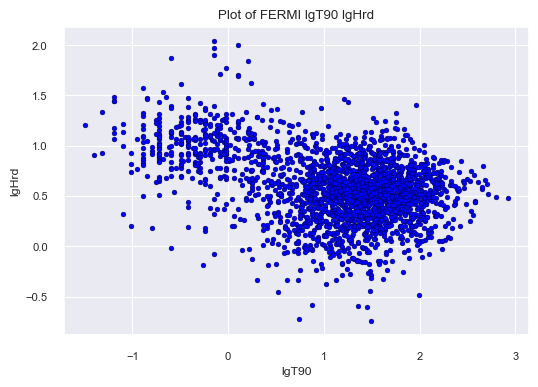

In [149]:
df_fermi_t90_hrd = data_operations.load(
    cat_name=cat_fermi,
    feats=features.copy(),
    without_outliers=True,
    plot_data=True,
    verbose=False,
)
df_fermi_t90_hrd.describe()

Creating models. 10 models with clusters from 1 to 10 have been created and saved. 
- The clusters are sorted based on the means on the x-axis. In other words, the cluster with the lowest mean on x-axis is named as "Cluster 1", and the rest is sorted according to the increasing mean on x-axis.
- Covariance type is "full".
- "max_iter" and "n_init" parameters of GMM are set to 10000 and 100, respectively.


In [150]:
model_operations.createGMMs(
    dataset_name=cat_fermi,
    data=df_fermi_t90_hrd,
    cov_type="full",
    n_clusters_max=10,
    verbose=False,
    max_iter=10000,
    n_init=100,
    sorting_clusters=True,
    plot_model=False,
)

All models are successfully created.


Plotting the models with cluster decision boundaries. The clusters are sorted accoding to the means of the features on the x-axis.

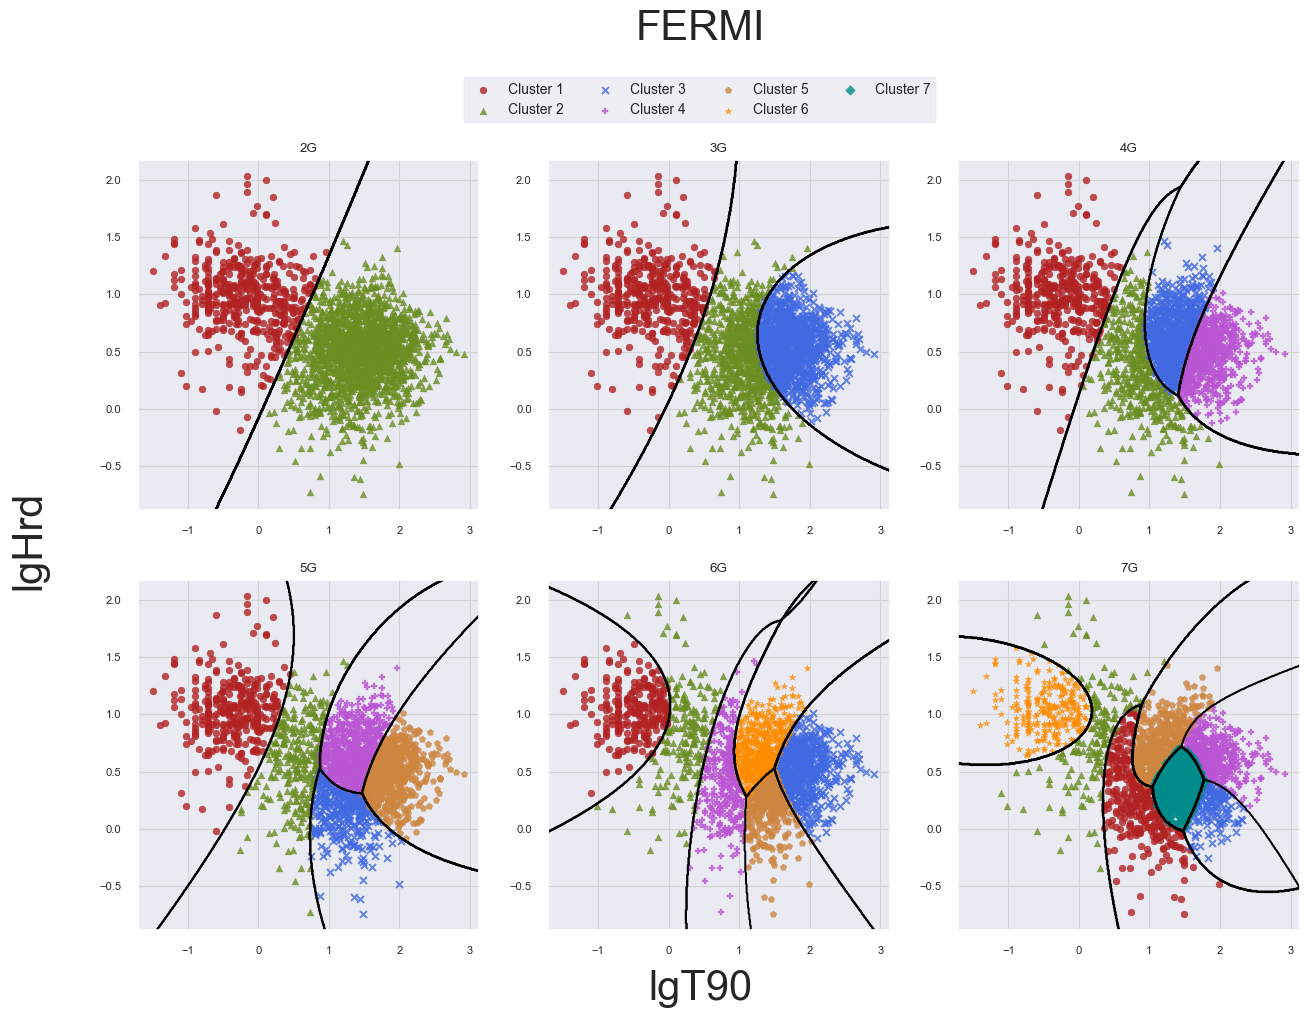

In [152]:
disp_operations.plot_models_as_grid(cat_name=cat_fermi, data = df_fermi_t90_hrd, feat_space=features)

Evaluating the performance: AIC, BIC, WCSS, Silhouette scores, Gap statistics, Davies-Bouldin, and Calinski-Harabsz scores are calculated and plotted. Each metric is arranged according to "higher-is-better" logic.

In [153]:
scores, normalized_scores = stats_operations.perform_statistical_tests(df_fermi_t90_hrd, features, cat_fermi)
normalized_scores

,aic,bic,chs,dbs,gap,sil_euc,sil_mah,wcss
k,,,,,,,,
1,0.00,0.00,NaN,NaN,NaN,NaN,NaN,0.00
2,0.92,0.97,1.00,1.00,NaN,1.00,1.00,0.68
3,0.99,1.00,0.87,0.71,NaN,0.38,0.52,0.83
4,0.98,0.95,0.54,0.58,NaN,0.19,0.41,0.88
5,0.97,0.90,0.48,0.69,NaN,0.22,0.41,0.93
6,0.98,0.86,0.33,0.63,NaN,0.16,0.37,0.95
7,1.00,0.84,0.00,0.51,NaN,0.00,0.11,0.94
8,0.99,0.79,0.17,0.64,NaN,0.09,0.26,0.98
9,1.00,0.75,0.12,0.00,NaN,0.12,0.00,0.99


The scores are plotted. The numbers are arranged in a way that higher values indicate better performance. X-axis is the number of clusters, y-axis is the scores.

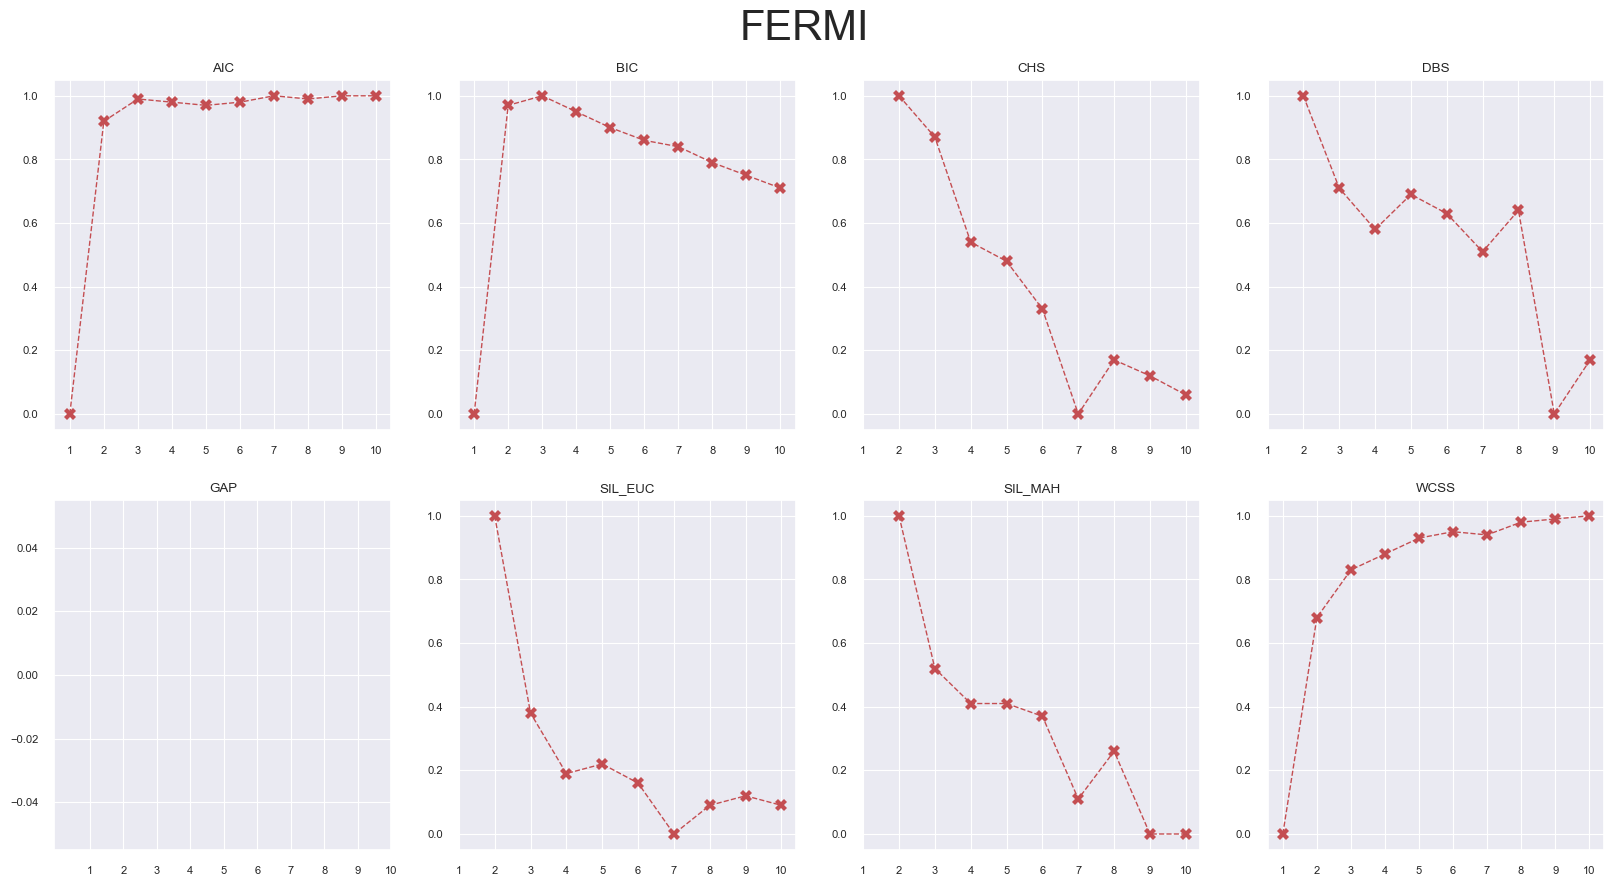

In [154]:
disp_operations.plot_scores_as_grid(normalized_scores, cat_fermi)

Heatmap of the scores:

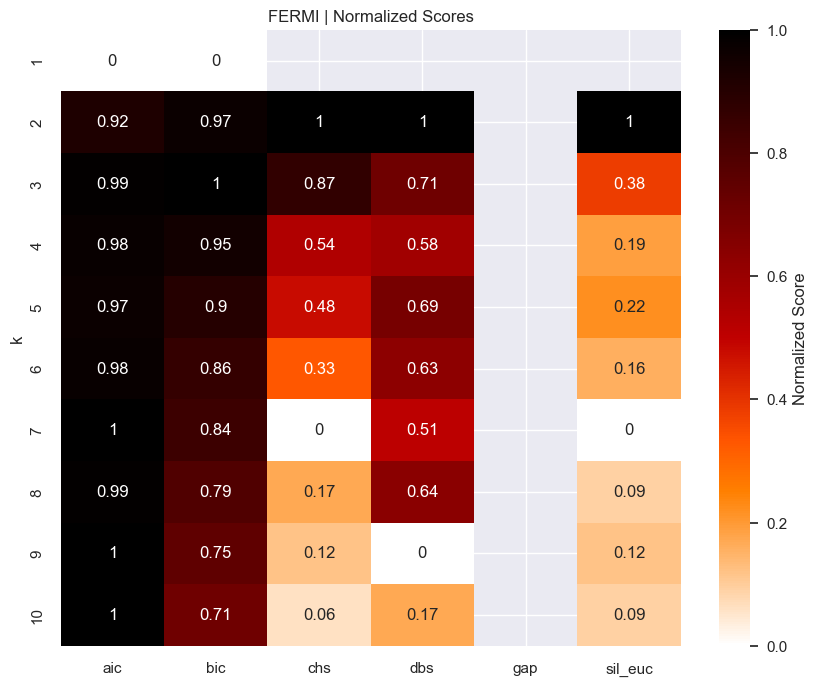

In [155]:
disp_operations.plot_heatmap(normalized_scores, cat_fermi)

-----

## 3. SWIFT

Loading the data where the outliers are eliminated. A summary of data is printed and the data is plotted.

,lgT90,lgHrd
count,1470.000000,1470.000000
mean,1.443412,-0.027163
std,0.782779,0.208473
min,-1.443698,-0.874140
25%,1.049218,-0.157182
50%,1.615424,-0.022055
75%,1.989075,0.113570
max,2.918150,0.660850


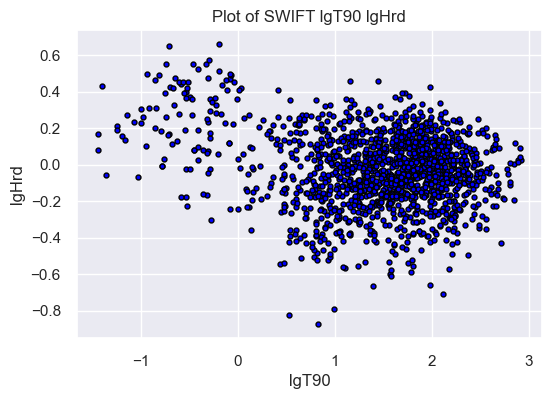

In [156]:
df_swift_t90_hrd = data_operations.load(
    cat_name=cat_swift,
    feats=features.copy(),
    without_outliers=True,
    plot_data=True,
    verbose=False,
)
df_swift_t90_hrd.describe()

Creating models. 10 models with clusters from 1 to 10 have been created and saved. 
- The clusters are sorted based on the means on the x-axis. In other words, the cluster with the lowest mean on x-axis is named as "Cluster 1", and the rest is sorted according to the increasing mean on x-axis.
- Covariance type is "full".
- "max_iter" and "n_init" parameters of GMM are set to 10000 and 100, respectively.


In [157]:
model_operations.createGMMs(
    dataset_name=cat_swift,
    data=df_swift_t90_hrd,
    cov_type="full",
    n_clusters_max=10,
    verbose=False,
    max_iter=10000,
    n_init=100,
    sorting_clusters=True,
    plot_model=False,
)

All models are successfully created.


Plotting the models with cluster decision boundaries. The clusters are sorted accoding to the means of the features on the x-axis.

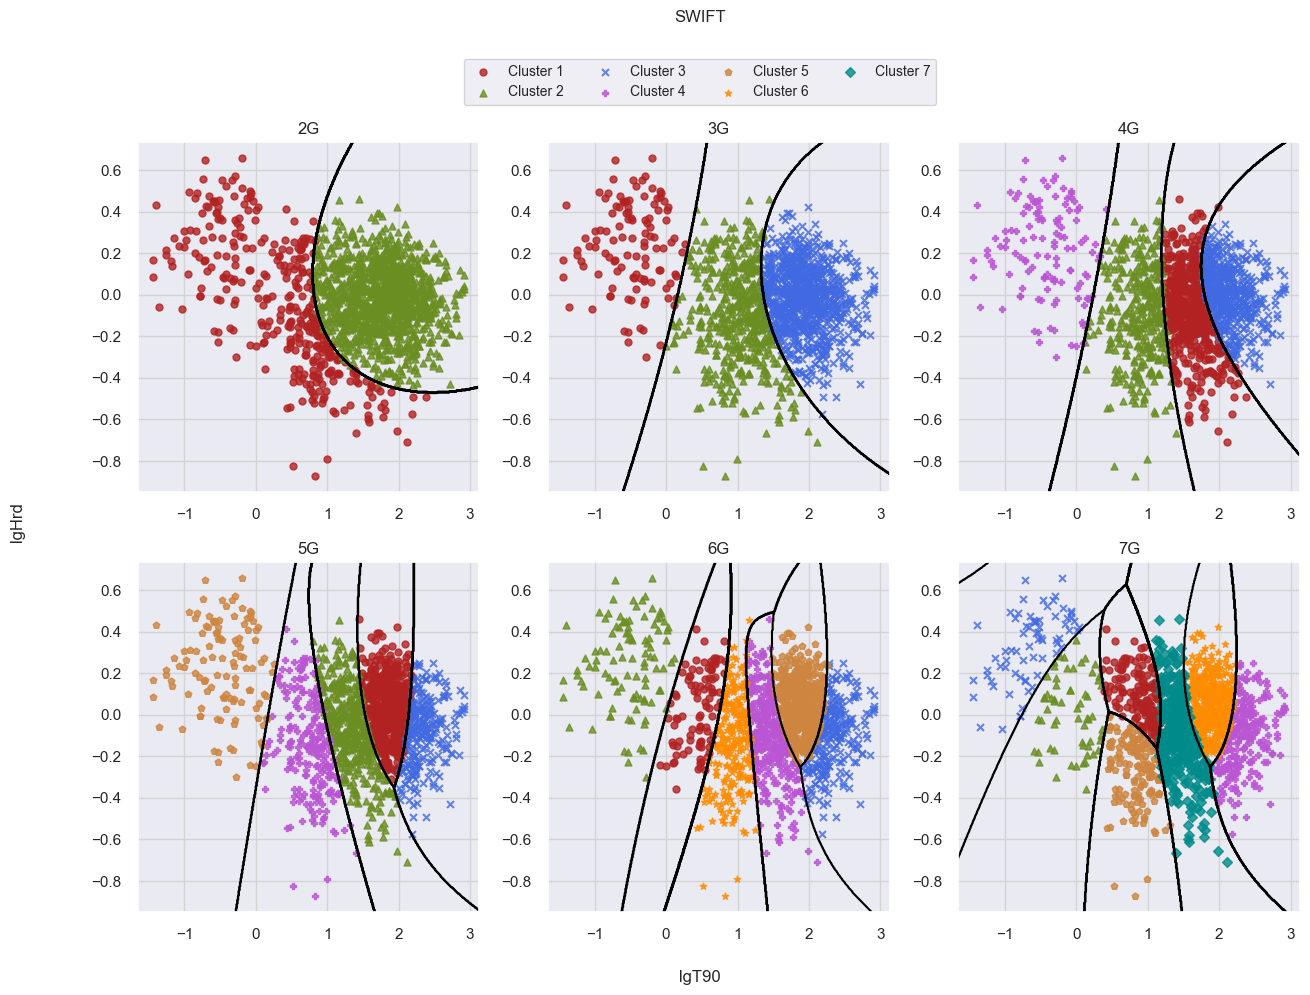

In [158]:
disp_operations.plot_models_as_grid(cat_name=cat_swift, data = df_swift_t90_hrd, feat_space=features)

Evaluating the performance: AIC, BIC, WCSS, Silhouette scores, Gap statistics, Davies-Bouldin, and Calinski-Harabsz scores are calculated and plotted. Each metric is arranged according to "higher-is-better" logic.

In [159]:
scores, normalized_scores = stats_operations.perform_statistical_tests(df_swift_t90_hrd, features, cat_swift)
normalized_scores

,aic,bic,chs,dbs,gap,sil_euc,sil_mah,wcss
k,,,,,,,,
1,0.00,0.00,NaN,NaN,NaN,NaN,NaN,0.00
2,0.88,0.93,0.00,0.59,NaN,1.00,0.75,0.54
3,1.00,1.00,0.89,1.00,NaN,0.89,1.00,0.82
4,0.99,0.92,1.00,0.62,NaN,0.32,0.62,0.90
5,0.99,0.85,0.87,0.51,NaN,0.21,0.50,0.93
6,1.00,0.79,0.82,0.38,NaN,0.11,0.50,0.95
7,1.00,0.72,0.57,0.00,NaN,0.00,0.25,0.96
8,0.99,0.64,0.62,0.16,NaN,0.00,0.00,0.98
9,0.98,0.57,0.70,0.30,NaN,0.16,0.00,0.99


The scores are plotted. The numbers are arranged in a way that higher values indicate better performance. X-axis is the number of clusters, y-axis is the scores.

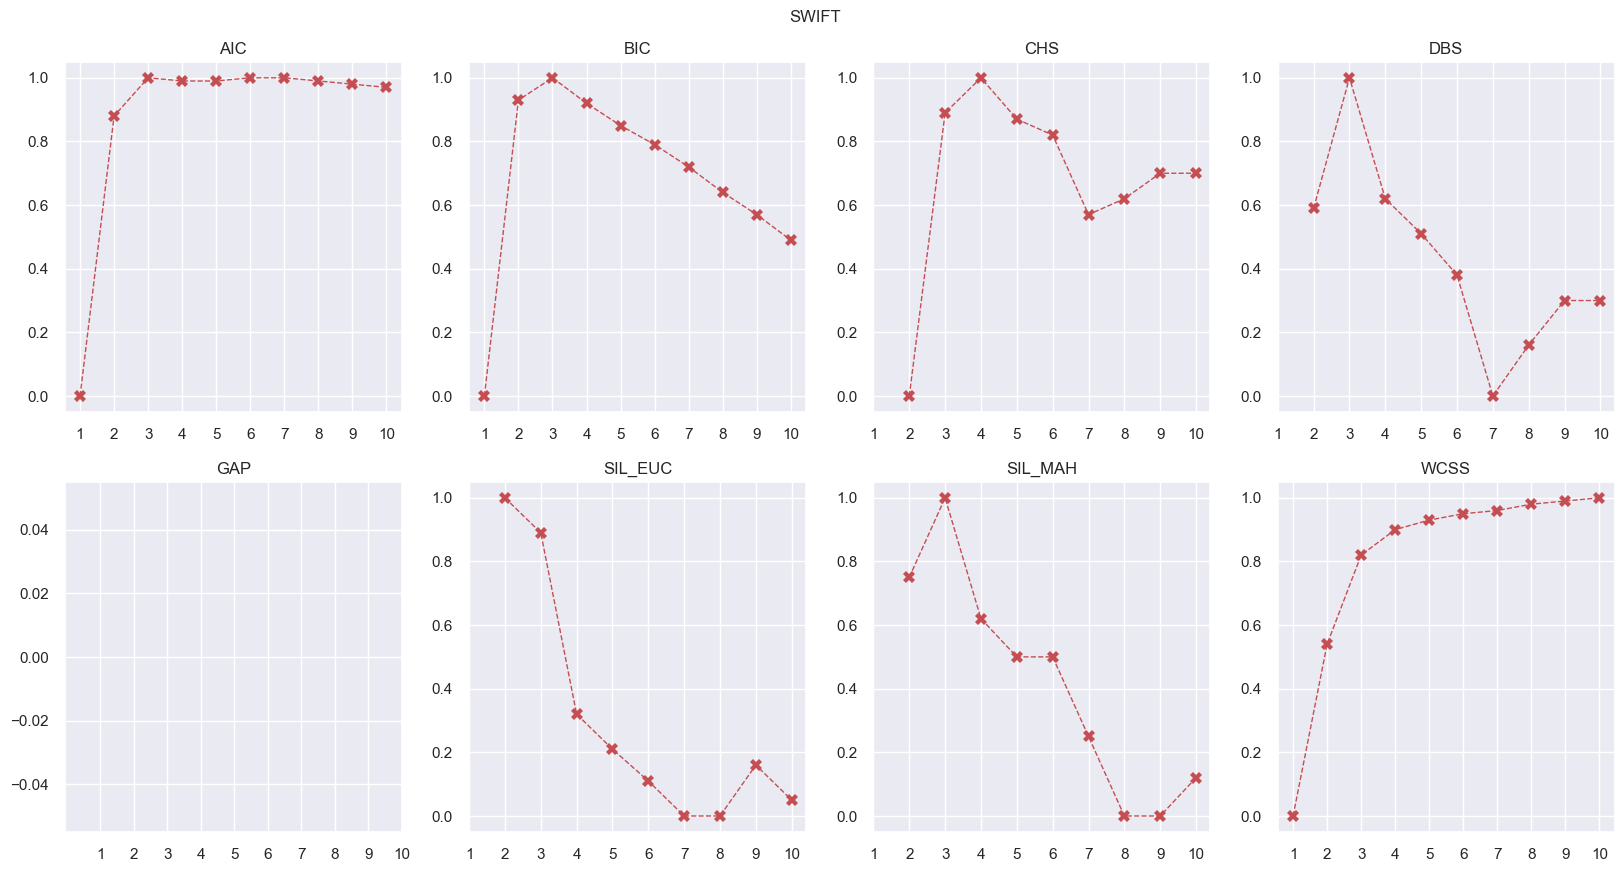

In [160]:
disp_operations.plot_scores_as_grid(normalized_scores, cat_swift)

Heatmap of the scores:

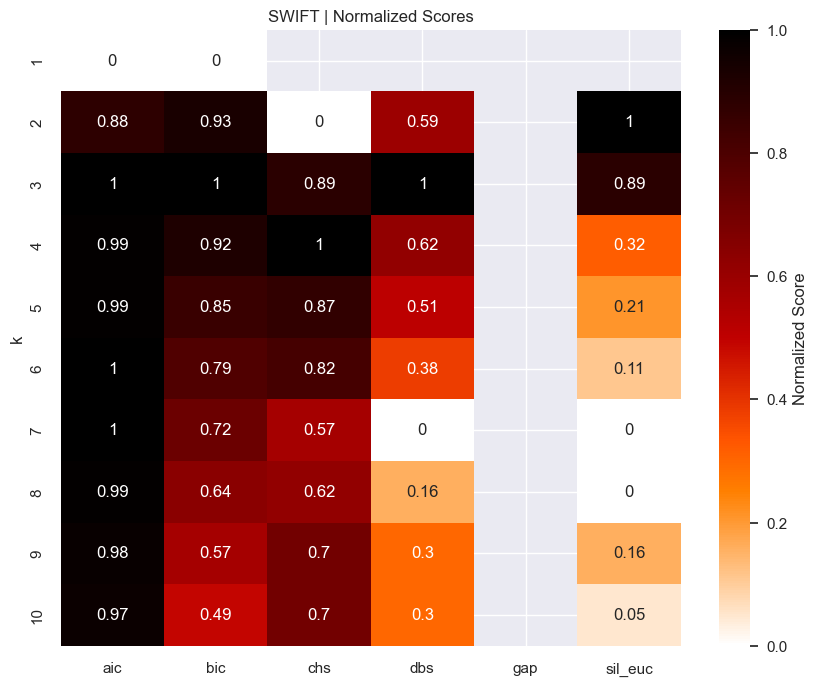

In [161]:
disp_operations.plot_heatmap(normalized_scores, cat_swift)

-----

-----

# CROSS-CATALOGUE ANALYSES

### 1. Wasserstein Distance

!!!! cluster özelinde figürler konacak!

Model with 1 cluster:

In [51]:
stats_operations.perform_wasserstein(feat_space=features.copy(), random_state=None, n_components=1)

,BATSE-FERMI,BATSE-SWIFT,FERMI-SWIFT
C1,0.23,0.84,0.71


Model with 2 clusters:

In [52]:
stats_operations.perform_wasserstein(feat_space=features.copy(), random_state=None, n_components=2)

,BATSE-FERMI,BATSE-SWIFT,FERMI-SWIFT
C1,0.12,1.25,1.22
C2,0.10,0.61,0.62


Model with 3 clusters:

In [53]:
stats_operations.perform_wasserstein(feat_space=features.copy(), random_state=None, n_components=3)

,BATSE-FERMI,BATSE-SWIFT,FERMI-SWIFT
C1,0.14,0.81,0.80
C2,0.23,0.59,0.56
C3,0.12,0.63,0.61
